In [1]:
import pandas as pd
import supy as sp
import matplotlib.pyplot as plt
# in_folder = '../data/'
sp.show_version()

c:\Users\xbacos\Miniconda3\envs\supy_env\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\xbacos\Miniconda3\envs\supy_env\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\xbacos\Miniconda3\envs\supy_env\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


SuPy version: 2023.7.3.dev0
-------------


In [2]:
def merge_output(scenario_list, suffix_list):

    df_output_merge_x=df_output_merge_x=pd.concat(scenario_list,axis=1,join='inner', keys = suffix_list).swaplevel(0,-1,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1).loc[grid]
    df_merge_x=df_output_merge_x.SUEWS

    # add available energy, AE
    df_merge_x=df_merge_x.stack().eval('AE=QN+QF-QS').unstack()

    return df_merge_x


In [13]:
TN_rc ='RunControl_TN.nml' 
NF_rc ='RunControl_NF.nml' 
MP_rc ='RunControl_MP.nml' 
MC_rc ='RunControl_MC.nml' 
       
df_state_init_TN = sp.init_supy(TN_rc)
df_state_init_NF = sp.init_supy(NF_rc)
df_state_init_MP = sp.init_supy(MP_rc)
df_state_init_MC = sp.init_supy(MC_rc)

2023-11-03 09:55:53,731 - SuPy - INFO - All cache cleared.
2023-11-03 09:55:54,791 - SuPy - INFO - All cache cleared.
2023-11-03 09:55:55,869 - SuPy - INFO - All cache cleared.
2023-11-03 09:55:57,018 - SuPy - INFO - All cache cleared.


In [12]:
for i in df_state_init_MC.columns:
    print(i)

('ah_min', '(0,)')
('ah_min', '(1,)')
('ah_slope_cooling', '(0,)')
('ah_slope_cooling', '(1,)')
('ah_slope_heating', '(0,)')
('ah_slope_heating', '(1,)')
('ahprof_24hr', '(0, 0)')
('ahprof_24hr', '(0, 1)')
('ahprof_24hr', '(1, 0)')
('ahprof_24hr', '(1, 1)')
('ahprof_24hr', '(2, 0)')
('ahprof_24hr', '(2, 1)')
('ahprof_24hr', '(3, 0)')
('ahprof_24hr', '(3, 1)')
('ahprof_24hr', '(4, 0)')
('ahprof_24hr', '(4, 1)')
('ahprof_24hr', '(5, 0)')
('ahprof_24hr', '(5, 1)')
('ahprof_24hr', '(6, 0)')
('ahprof_24hr', '(6, 1)')
('ahprof_24hr', '(7, 0)')
('ahprof_24hr', '(7, 1)')
('ahprof_24hr', '(8, 0)')
('ahprof_24hr', '(8, 1)')
('ahprof_24hr', '(9, 0)')
('ahprof_24hr', '(9, 1)')
('ahprof_24hr', '(10, 0)')
('ahprof_24hr', '(10, 1)')
('ahprof_24hr', '(11, 0)')
('ahprof_24hr', '(11, 1)')
('ahprof_24hr', '(12, 0)')
('ahprof_24hr', '(12, 1)')
('ahprof_24hr', '(13, 0)')
('ahprof_24hr', '(13, 1)')
('ahprof_24hr', '(14, 0)')
('ahprof_24hr', '(14, 1)')
('ahprof_24hr', '(15, 0)')
('ahprof_24hr', '(15, 1)')
('

In [16]:
df_state_init_MC.dz_roof

ind_dim,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(1, 0)","(1, 1)","(1, 2)","(1, 3)","(1, 4)","(2, 0)","(2, 1)","(2, 2)","(2, 3)","(2, 4)"
grid,,,,,,,,,,,,,,,
1,0.01,0.04,0.27,0.01,0.01,1.0,0.04,0.27,0.01,0.01,1.0,0.04,0.27,0.01,0.01


In [4]:
grid = df_state_init_TN.index[0]
df_forcing = sp.load_forcing_grid(TN_rc, grid)

s = '2018 07 15'
e = '2018 07 25'

# warm week 2012  to reduce time for test setup
df_forcing=df_forcing.loc[s: e].iloc[1:]

2023-11-03 09:54:38,827 - SuPy - INFO - All cache cleared.


<Axes: >

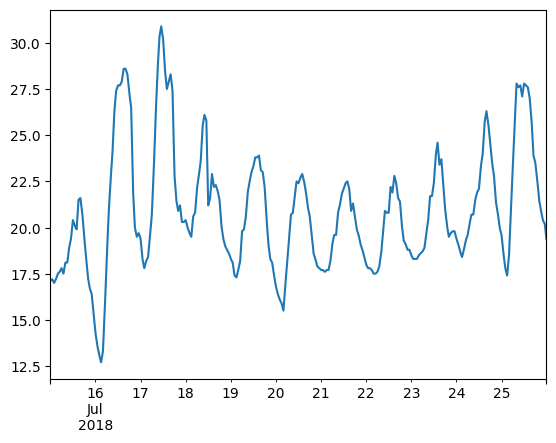

In [5]:
df_forcing['Tair'].plot()

In [53]:
# df_output_TN, df_state_final_TN = sp.run_supy(df_forcing, df_state_init_TN)
# df_output_NF, df_state_final_NF = sp.run_supy(df_forcing, df_state_init_NF)
df_output_MP, df_state_final_MP = sp.run_supy(df_forcing, df_state_init_MP)
df_output_MC, df_state_final_MC = sp.run_supy(df_forcing, df_state_init_MC)

2023-11-02 10:55:43,610 - SuPy - INFO - ====================
2023-11-02 10:55:43,611 - SuPy - INFO - Simulation period:
2023-11-02 10:55:43,612 - SuPy - INFO -   Start: 2018-07-15 00:05:00
2023-11-02 10:55:43,613 - SuPy - INFO -   End: 2018-07-25 23:55:00
2023-11-02 10:55:43,614 - SuPy - INFO - 
2023-11-02 10:55:43,615 - SuPy - INFO - No. of grids: 1
2023-11-02 10:55:43,616 - SuPy - INFO - SuPy is running in serial mode
2023-11-02 10:57:24,484 - SuPy - INFO - Execution time: 100.9 s
2023-11-02 10:57:24,486 - SuPy - INFO - ====================

2023-11-02 10:57:24,487 - SuPy - INFO - ====================
2023-11-02 10:57:24,487 - SuPy - INFO - Simulation period:
2023-11-02 10:57:24,488 - SuPy - INFO -   Start: 2018-07-15 00:05:00
2023-11-02 10:57:24,489 - SuPy - INFO -   End: 2018-07-25 23:55:00
2023-11-02 10:57:24,490 - SuPy - INFO - 
2023-11-02 10:57:24,490 - SuPy - INFO - No. of grids: 1
2023-11-02 10:57:24,491 - SuPy - INFO - SuPy is running in serial mode
2023-11-02 11:01:07,505 - 

In [37]:
df_merge = merge_output([df_output_MP, df_output_MC], ['Million Program', 'Mixed City'])

In [1]:
var = 'QN'

df_output_MP.SUEWS['QS'].plot()

NameError: name 'df_output_MP' is not defined